In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image_path = r"C:\Users\ghwns\CV-Projects\urban-scene-segmentation\Dataset\Cityspaces\images\train\aachen\aachen_000000_000019_leftImg8bit.png"
mask_path  = r"C:\Users\ghwns\CV-Projects\urban-scene-segmentation\Dataset\Cityspaces\gtFine\train\aachen\aachen_000000_000019_gtFine_color.png"

In [4]:
image = np.array(Image.open(image_path))         
mask  = np.array(Image.open(mask_path))         

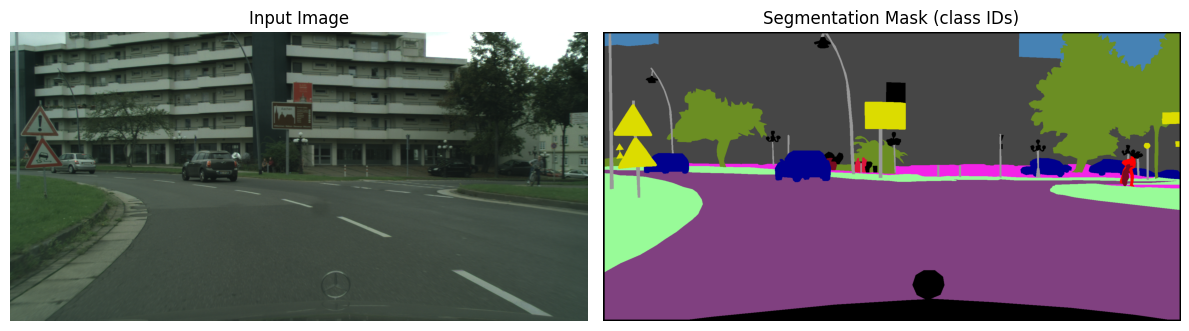

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Segmentation Mask (class IDs)")
plt.imshow(mask, cmap='nipy_spectral')  
plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
from torchvision import transforms

resize = transforms.Resize((256, 256))  # 원하는 크기로 맞춤
to_tensor = transforms.ToTensor()       # 이미지 전용 (0~1)

# 이미지 처리
image_resized = resize(Image.fromarray(image))   # PIL로 변환 후 resize
image_tensor = to_tensor(image_resized)

# 마스크 처리
mask_resized = resize(Image.fromarray(mask))
mask_tensor = np.array(mask_resized)             # 그대로 numpy로 처리 (H, W)

ModuleNotFoundError: No module named 'torchvision'

In [7]:
print("Image:", image_tensor.shape, image_tensor.dtype)  # torch.float32
print("Mask :", mask_tensor.shape, mask_tensor.dtype)    # numpy.uint8

NameError: name 'image_tensor' is not defined

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Resized Image")
plt.imshow(image_tensor.permute(1, 2, 0))  # (C, H, W) → (H, W, C)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Resized Mask")
plt.imshow(mask_tensor, cmap='nipy_spectral')
plt.axis('off')
plt.show()